In [1]:
%pylab inline
from scipy.integrate import *

Populating the interactive namespace from numpy and matplotlib


$Y=X+T$

X follows a uniform distribution $[0,d]$

T follows the exponential distribution with $\tau=1$

null hypothesis $d=5$

single alternative hypothesis $d=4$

# Q1

### Let $Y$ has the pdf $h(y)$, $X$ has pdf $f(x)=\frac{1}{d}$ and T has pdf $g(t)=e^{-t}$, then

$\begin{aligned}h(y) &=\int_{-\infty}^{\infty} f(x) g(y-x) dx \\[8pt]&= \frac{1}{d} \int_{0}^{d} g(y-x)dx\\[8pt]&=\begin{cases}
0      & \quad y<0  \\
\frac{1}{d} \int_{0}^{y} e^{x-y}dx  & \quad 0\leqslant y<d\\
\frac{1}{d} \int_{0}^{d} e^{x-y}dx   & \quad d \leqslant y\\
  \end{cases}
\\[8pt]&=\begin{cases}
0      & \quad y<0  \\
\frac{1}{d} (1-e^{-y})  & \quad 0\leqslant y<d\\
\frac{1}{d} (e^d-1)e^{-y}   & \quad d \leqslant y\\
  \end{cases}
\end{aligned}$



In [2]:
import random

In [3]:
arr=genfromtxt("datafile.txt")

In [56]:
def h(y,d):
    Z=[]
    for i in range(len(y)):
        z=y[i]
        if any(z<0):
            Z.append(0)
        elif any(0<=z<d):
            Z.append(1/d*(1-e**(-z)))
        elif any(d<=z):
            Z.append(1/d*(e**d-1)*e**(-z))
    return Z

In [57]:
dnull=5
dalter=4

x=linspace(0,10,1000)
hnull=array(h(x,dnull))
halter=array(h(x,dalter))


s=0.25*len(arr) #scale

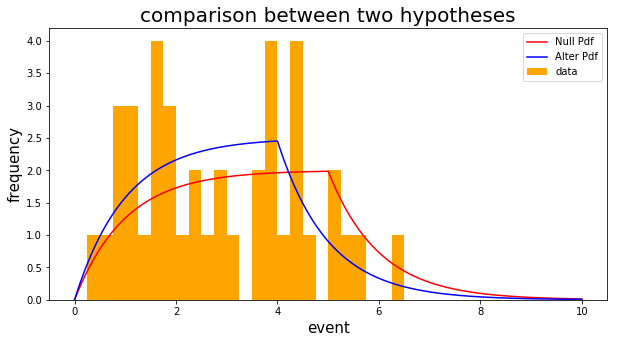

In [58]:
figure(figsize=(10,5))
plot(x,s*hnull,'r-',label='Null Pdf')
plot(x,s*halter,'b-',label='Alter Pdf')
bi=linspace(0,10,41)
hist(arr,bins=bi,color='orange',label='data')
xlabel('event',fontsize=15)
ylabel('frequency',fontsize=15)
title('comparison between two hypotheses',fontsize=20)
legend(loc='best')
show()

# Q2

In [59]:
print('the test statistic value is:',mean(arr))

the test statistic value is: 2.899650532


# Q3

In [60]:
def gnr(d,n,N):
    R=[]
    for i in range(N):
        T=[]
        for j in range(n):
            X=random.uniform(0,d)
            Y=random.expovariate(1)
            T.append(X+Y)
        R.append(mean(T))
    return R

In [61]:
nn=40
NN=10000

tnull=gnr(dnull,nn,NN)
talter=gnr(dalter,nn,NN)

bs = arange(2.0,5.1,0.1)

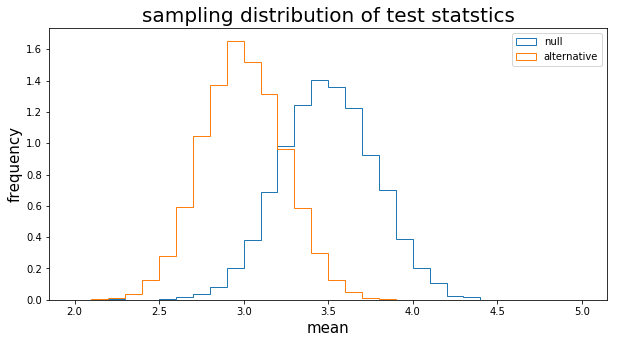

In [62]:
figure(figsize=(10,5))
hist(tnull,density=1,bins=bs,histtype=u'step',label='null')
hist(talter,density=1,bins=bs,histtype=u'step',label='alternative')
xlabel('mean',fontsize=15)
ylabel('frequency',fontsize=15)
title('sampling distribution of test statstics',fontsize=20)
legend(loc='best')
show()

$$\bar{Y}=\frac{1}{n}\sum_{i=1}^{n}Y_{i}$$

#### According to central limit theorem, the distribution of statistics approaches a gaussian, 

#### with the mean $$\mu_\bar{Y}=\mu_{Y}$$ and variance  $$\sigma_{\bar{Y}}^2=\frac{\sigma^2_{Y}}{n}$$


$\mu=E[Y]=E[X]+E[T]=d/2+1$

$V[Y]=V[X]+V[T]=\frac{d^2}{12}+1^2=\frac{d^2}{12}+1$

In [63]:
def G(x,d):
    m=d/2+1
    s=(d**2/12+1)/nn
    Y=[]
    for i in range(len(x)):
        Y.append(1/sqrt(2*pi*s)*e**(-(x[i]-m)**2/(2*s)))
    return Y

In [64]:
x=linspace(2,4.5,1000)
Gnull=G(x,dnull)
Galter=G(x,dalter)

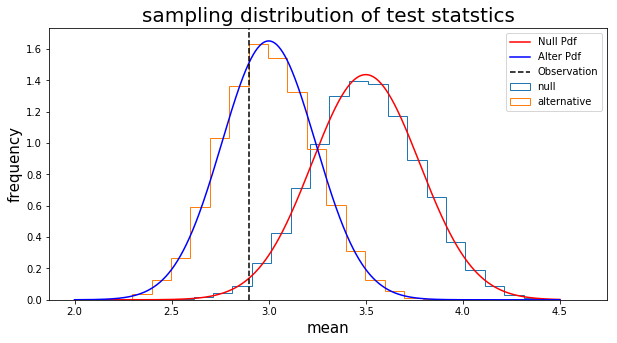

In [65]:
figure(figsize=(10,5))
plot(x,Gnull,'r-',label='Null Pdf')
plot(x,Galter,'b-',label='Alter Pdf')
hist(tnull,density=1,bins=bsn,histtype=u'step',label='null')
hist(talter,density=1,bins=bsa,histtype=u'step',label='alternative')
xlabel('mean',fontsize=15)
ylabel('frequency',fontsize=15)
axvline(mean(arr), color='k', ls='--', label='Observation')
title('sampling distribution of test statstics',fontsize=20)
legend(loc='best')
show()

Apparently, the Gaussian pdfs are good approximations.

# Q4

### Since the alternative hypothesis is located at the left of null hypothesis, the small value of the mean is more anomalous, then P value is given by:

$P=\int_{-\infty}^{obs} G(t|H_{0}) dt$

In [66]:
def Gau(x,d):
    m=d/2+1
    s=(d**2/12+1)/nn
    return (1/sqrt(2*pi*s)*e**(-(x-m)**2/(2*s)))

P = quad(Gau, -inf, mean(arr),args=(dnull))[0]
print('the P-value is : %s'%round(P,4))

the P-value is : 0.0153


It can be seen that the P-value is smaller than 0.05, the null hypothesis is rejected at 95% confidence level.

# Q5

$$P(H_0|x)=\frac{1}{1+1/(\text{Posterior Odds})}$$

### Where the posterior odds , is the ratio between the null hypothesis and the alternative hypothesis within 0.1 of the data test statistic value.

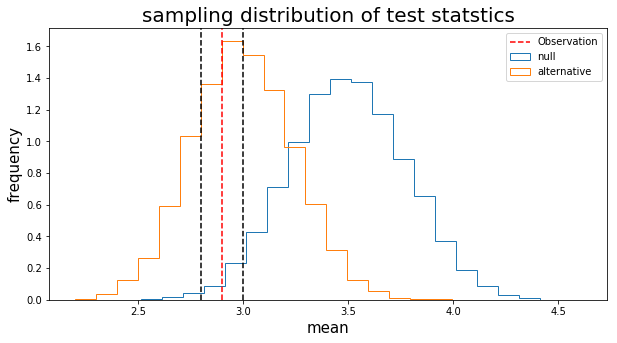

In [67]:
figure(figsize=(10,5))
hist(tnull,density=1,bins=bsn,histtype=u'step',label='null')
hist(talter,density=1,bins=bsa,histtype=u'step',label='alternative')
axvline(mean(arr), color='r', ls='--', label='Observation')
axvline(mean(arr)+0.1, color='k', ls='--')
axvline(mean(arr)-0.1, color='k', ls='--')

xlabel('mean',fontsize=15)
ylabel('frequency',fontsize=15)
title('sampling distribution of test statstics',fontsize=20)
legend(loc='best')
show()

In [68]:
podd=len(where(abs(tnull-mean(arr))<=0.1)[0])/len(where(abs(talter-mean(arr))<=0.1)[0])
print('the Posterior Odds is %s'%podd)
pprob=1/(1+1/podd)

print('the Posterior Probability for the null hypothesis is %s'%round(pprob,4))

the Posterior Odds is 0.09530112508272667
the Posterior Probability for the null hypothesis is 0.087


# Q6

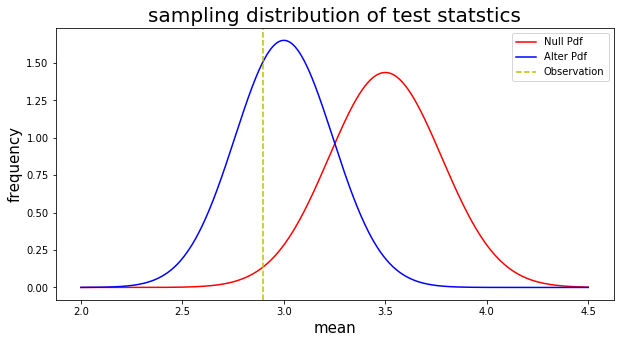

In [69]:
figure(figsize=(10,5))
plot(x,Gnull,'r-',label='Null Pdf')
plot(x,Galter,'b-',label='Alter Pdf')
axvline(mean(arr), color='y', ls='--', label='Observation')
xlabel('mean',fontsize=15)
ylabel('frequency',fontsize=15)
title('sampling distribution of test statstics',fontsize=20)
legend(loc='best')
show()

In [ ]:
podd=Gau(mean(arr),dnull)/Gau(mean(arr),dalter)
print('the Posterior Odds is %s'%podd)
pprob=1/(1+1/podd)

print('the Posterior Probability for the null hypothesis is %s'%round(pprob,4))